In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics
import statsmodels.api as sm
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

%matplotlib inline

In [2]:
#import cleaned csv
logs=pd.read_csv('Data_Cleaned.csv', index_col=0)
#Import cleaned and scaled csv
logs_scaled=pd.read_csv('Scaled_Data.csv', index_col=0)

In [3]:
logs.dropna(inplace=True)
logs[:26].head()

,Observation_Num,UWI_PROXY,depth,curve1,curve2,curve3,curve4,curve5,target_log,curve1_diff,...,Roll_Target_diff_2nd,Roll20_curve1_diff_2nd,Roll20_curve1,Ln_curve3,Cluster,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
21,22,uwi1,7510.5,71.005,0.002,1.855,0.352,2.616,50.000,0.451,...,133.373017,0.999059,5.795630,0.617885,4.0,0.0,0.0,0.0,0.0,1.0
22,23,uwi1,7511.0,70.049,0.005,1.844,0.355,2.578,80.958,0.956,...,753.417640,0.969979,5.733276,0.611937,4.0,0.0,0.0,0.0,0.0,1.0
23,24,uwi1,7511.5,67.642,0.024,1.844,0.358,2.566,93.694,2.407,...,646.029264,0.885825,5.606104,0.611937,4.0,0.0,0.0,0.0,0.0,1.0
24,25,uwi1,7512.0,66.297,0.000,1.843,0.361,2.574,85.435,1.345,...,504.704977,0.824823,5.272441,0.611395,4.0,0.0,0.0,0.0,0.0,1.0
25,26,uwi1,7512.5,66.074,0.001,1.856,0.364,2.582,69.069,0.223,...,469.930625,0.816285,5.031000,0.618424,4.0,0.0,0.0,0.0,0.0,1.0


In [4]:
#Use standard scaler to scale all independant variables for KNN or Ridge Model
logs_scaled.dropna(inplace=True)
logs_scaled.head()

,Observation_Num,UWI_PROXY,depth,curve1,curve2,curve3,curve4,curve5,target_log,curve1_diff,...,Roll20_curve1_diff_2nd,Roll20_curve1,Ln_curve3,target_log_scaled,Cluster,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
21,22,uwi1,7510.5,-0.464350,-0.574956,-0.165601,1.180719,0.976477,50.000,-0.559500,...,-0.194074,-0.275302,-0.493080,-2.227432,4.0,0.0,0.0,0.0,0.0,1.0
22,23,uwi1,7511.0,-0.492996,-0.506037,-0.165699,1.209107,0.552577,80.958,-0.433004,...,-0.194430,-0.275544,-0.497483,-0.125151,4.0,0.0,0.0,0.0,0.0,1.0
23,24,uwi1,7511.5,-0.565122,-0.069554,-0.165699,1.237495,0.418714,93.694,-0.069549,...,-0.195462,-0.276037,-0.497483,0.739719,4.0,0.0,0.0,0.0,0.0,1.0
24,25,uwi1,7512.0,-0.605425,-0.620901,-0.165708,1.265883,0.507956,85.435,-0.335565,...,-0.196211,-0.277330,-0.497885,0.178871,4.0,0.0,0.0,0.0,0.0,1.0
25,26,uwi1,7512.5,-0.612107,-0.597929,-0.165592,1.294270,0.597198,69.069,-0.616610,...,-0.196315,-0.278266,-0.492681,-0.932504,4.0,0.0,0.0,0.0,0.0,1.0


In [20]:
#Designate Independant and dependant variables and split to train test
feature_cols=['curve1','Ln_curve3','curve4','curve5']
X=logs_scaled[feature_cols]
y=logs_scaled.target_log

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [31]:
# Calculate TRAINING ERROR and TESTING ERROR for K=1 through 100.
k_range = list(range(1, 35))
training_RMSE = []
testing_RMSE = []

# Find test accuracy for all values of K between 1 and 100 (inclusive).
for k in k_range:

    # Instantiate the model with the current K value.
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training error MSRE.
    y_pred_class = knn.predict(X_train)
    training_accuracy = sqrt(metrics.mean_squared_error(y_train, y_pred_class))
    training_RMSE.append(training_accuracy)
    
    # Calculate MSRE.
    y_pred_class = knn.predict(X_test)
    testing_accuracy = sqrt(metrics.mean_squared_error(y_test, y_pred_class))
    testing_RMSE.append(testing_accuracy)

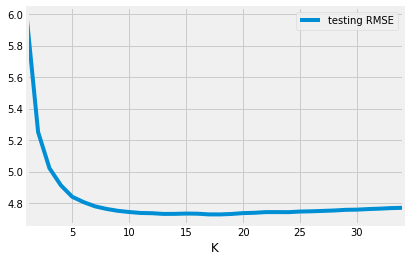

In [37]:
# Create a DataFrame of K, training error, and testing error.
column_dict = {'K': k_range, 'training RMSE':training_RMSE, 'testing RMSE':testing_RMSE}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
# Find the minimum testing error and the associated K value.
df.sort_values('testing RMSE',ascending=True)
#Plot testing RMSE
df.plot(y='testing RMSE')

In [11]:
from sklearn.model_selection import GridSearchCV

k_range=list(range(1,25))
params = {'n_neighbors':k_range}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 16}

Text(0, 0.5, 'Testing RMSE')

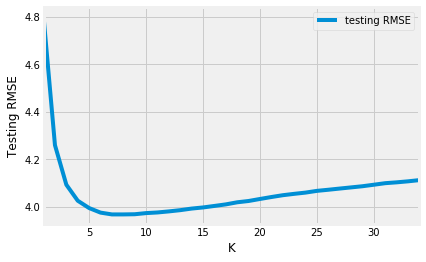

In [13]:
##### New Model
#Designate Independant and dependant variables and split to train test
feature_cols=['curve1', 'Ln_curve3','curve4','curve5','cluster_1','cluster_2','cluster_3','cluster_4','Roll20_curve1_diff_2nd']
X=logs_scaled[feature_cols]
y=logs_scaled.target_log

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# Calculate TRAINING ERROR and TESTING ERROR for K=1 through 100.
k_range = list(range(1, 35))
training_RMSE = []
testing_RMSE = []

# Find test accuracy for all values of K between 1 and 100 (inclusive).
for k in k_range:

    # Instantiate the model with the current K value.
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training error MSRE.
    y_pred_class = knn.predict(X_train)
    training_accuracy = sqrt(metrics.mean_squared_error(y_train, y_pred_class))
    training_RMSE.append(training_accuracy)
    
    # Calculate MSRE.
    y_pred_class = knn.predict(X_test)
    testing_accuracy = sqrt(metrics.mean_squared_error(y_test, y_pred_class))
    testing_RMSE.append(testing_accuracy)
    
# Create a DataFrame of K, training error, and testing error.
column_dict = {'K': k_range, 'training RMSE':training_RMSE, 'testing RMSE':testing_RMSE}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
#Plot testing RMSE
df.plot(y='testing RMSE')
plt.ylabel('Testing RMSE')
#####For model with 'curve1','Ln_curve3','curve4','curve5','curve5_diff' ->>>> Ideal K == 12, RMSE ~4.79, underperformed simpler model
#####For model with 'curve1','Ln_curve3','curve4','curve5','Roll20_curve1' ->>>> Ideal K == 7, RMSE ~4.52, Great Model
#### For model with 'curve1', 'Ln_curve3','curve4','curve5','clusters','Roll20_curve1' ->>>> Ideal K == 6, RMSE=3.92
#### For model with 'curve1', 'Ln_curve3','curve4','curve5','clusters ->>>>> Ideal K=12 RMSE=4.07
#### For model with 'curve1', 'Ln_curve3','curve4','curve5','clusters','Roll20_curve1','Roll20_curve1_diff_2nd'->> Ideal K=5, RMSE=3.8
#### For model with 'curve1', 'Ln_curve3','curve4','curve5','clusters', 'Roll20_curve1_diff_2nd'->> Ideal K=7 RMSE=3.97

In [14]:
# Find the minimum testing error and the associated K value.
df.sort_values('testing RMSE',ascending=True)

,training RMSE,testing RMSE
K,,
7,3.416924,3.968138
8,3.481641,3.968147
9,3.530976,3.968874
10,3.576305,3.973671
6,3.338660,3.975717
11,3.614067,3.976371
12,3.648380,3.980862
13,3.679909,3.986039
14,3.706473,3.992725


In [24]:
#### Run model and show 
feature_cols=['curve1', 'Ln_curve3','curve4','curve5','cluster_1','cluster_2','cluster_3','cluster_4','Roll20_curve1','Roll20_curve1_diff_2nd']
X=logs_scaled[feature_cols]
y=logs_scaled.target_log
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
train_RMSE=sqrt(metrics.mean_squared_error(y_train, y_pred_train))
print('training_RMSE:', train_RMSE)
y_pred_test = knn.predict(X_test)
test_RMSE=sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('testing_RMSE:', test_RMSE)
test_R2=metrics.r2_score(y_test, y_pred_test)
print('testing_R2:', test_R2)
logs_scaled['predicted_curve']=knn.predict(X)

training_RMSE: 3.182642487941513
testing_RMSE: 3.818688517269153
testing_RMSE: 0.9324724062520383


(40, 140)

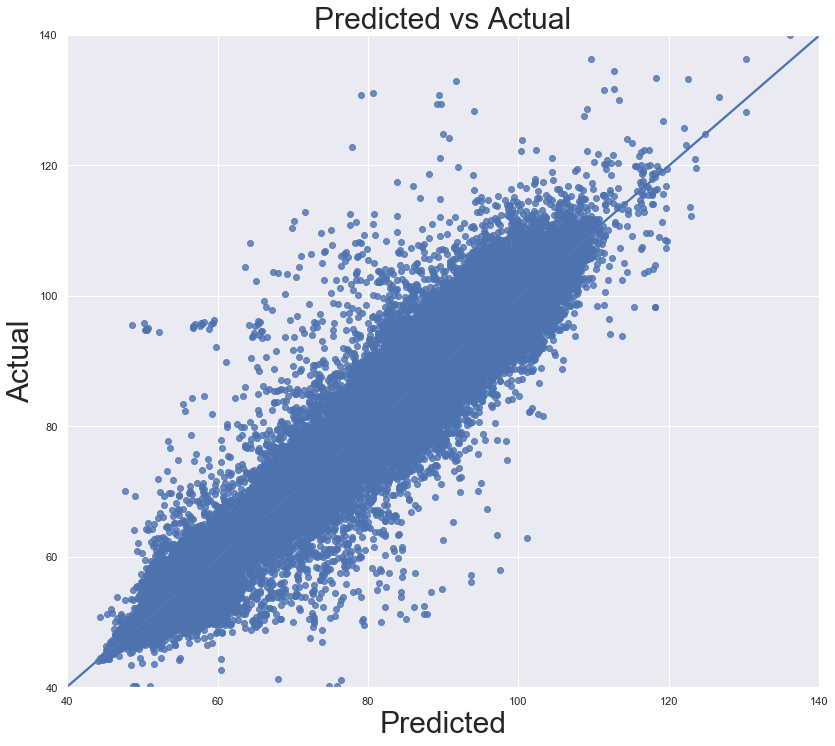

In [25]:
sns.set(rc={'figure.figsize':(12,12)})
ax=sns.regplot(x=y_pred_test,y=y_test)
ax.set_xlabel('Predicted',fontsize=30)
ax.set_ylabel('Actual',fontsize=30)
ax.set_title('Predicted vs Actual',fontsize=30)
plt.ylim(40, 140)
plt.xlim(40, 140)

In [26]:
logs_scaled.head()

,Observation_Num,UWI_PROXY,depth,curve1,curve2,curve3,curve4,curve5,target_log,curve1_diff,...,Roll20_curve1,Ln_curve3,target_log_scaled,Cluster,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,predicted_curve
21,22,uwi1,7510.5,-0.464350,-0.574956,-0.165601,1.180719,0.976477,50.000,-0.559500,...,-0.275302,-0.493080,-2.227432,4.0,0.0,0.0,0.0,0.0,1.0,81.781667
22,23,uwi1,7511.0,-0.492996,-0.506037,-0.165699,1.209107,0.552577,80.958,-0.433004,...,-0.275544,-0.497483,-0.125151,4.0,0.0,0.0,0.0,0.0,1.0,80.034333
23,24,uwi1,7511.5,-0.565122,-0.069554,-0.165699,1.237495,0.418714,93.694,-0.069549,...,-0.276037,-0.497483,0.739719,4.0,0.0,0.0,0.0,0.0,1.0,84.034333
24,25,uwi1,7512.0,-0.605425,-0.620901,-0.165708,1.265883,0.507956,85.435,-0.335565,...,-0.277330,-0.497885,0.178871,4.0,0.0,0.0,0.0,0.0,1.0,77.006500
25,26,uwi1,7512.5,-0.612107,-0.597929,-0.165592,1.294270,0.597198,69.069,-0.616610,...,-0.278266,-0.492681,-0.932504,4.0,0.0,0.0,0.0,0.0,1.0,83.087500


testing_R2: 0.9449412895169801


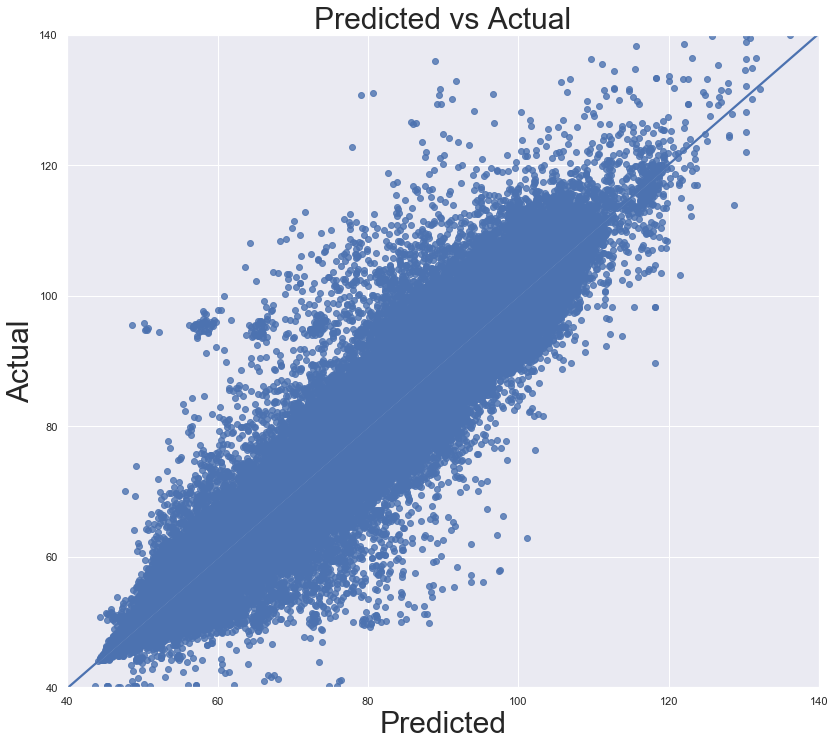

In [29]:
#Plot actual vs. predicted for the entire dataset
ax=sns.regplot(x='predicted_curve',y='target_log', data=logs_scaled)
ax.set_xlabel('Predicted',fontsize=30)
ax.set_ylabel('Actual',fontsize=30)
ax.set_title('Predicted vs Actual',fontsize=30)
plt.ylim(40, 140)
plt.xlim(40, 140)
R2=metrics.r2_score(logs_scaled['predicted_curve'],logs_scaled['target_log'])
print('testing_R2:', R2)

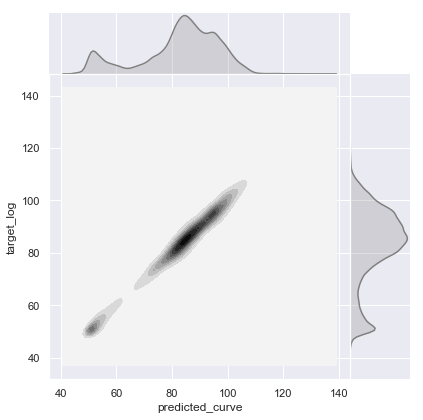

In [30]:
### Plot scatter data but get a sense for data density
sns.set(rc={'figure.figsize':(12,12)})
ax=sns.jointplot(x='predicted_curve',y='target_log', data=logs_scaled, kind='kde',color='grey', space=0)

In [31]:
#### Fit model on all data for predicted column #####
feature_cols=['curve1', 'Ln_curve3','curve4','curve5','cluster_1','cluster_2','cluster_3','cluster_4','Roll20_curve1','Roll20_curve1_diff_2nd']
X=logs_scaled[feature_cols]
y=logs_scaled.target_log
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X, y)
logs_scaled['predicted_curve']=knn.predict(X)

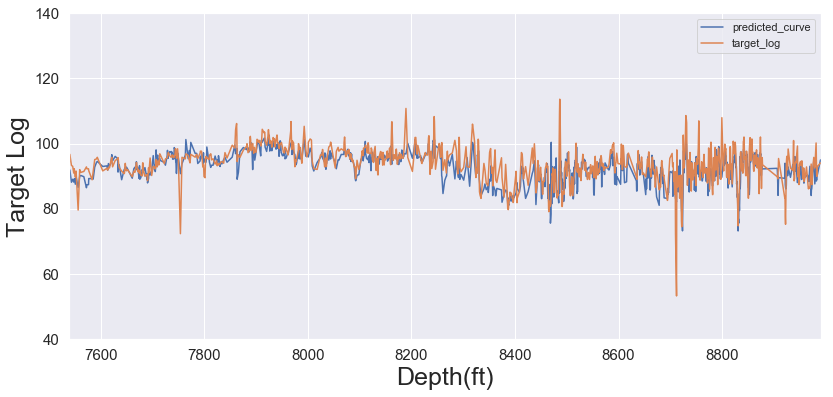

In [52]:
# Plot individual wells to look at predictions
logs_to_plot=logs_scaled.loc[(logs_scaled['UWI_PROXY']=='uwi42')&(logs_scaled['depth']<9000)]
ax=logs_to_plot.plot(x='depth',y=['predicted_curve','target_log'],figsize=(12,6),grid=True)
ax=plt.ylim(40, 140)
ax=plt.xlabel('Depth(ft)',fontsize=25)
ax=plt.ylabel('Target Log',fontsize=25)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)